<a href="https://colab.research.google.com/github/tyurinm/ScientificPython/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D1%83%D0%BF%D0%B0%D0%BA%D0%BE%D0%B2%D0%BA%D0%B8_%D0%BA%D1%80%D1%83%D0%B3%D0%BE%D0%B2_%D0%B2_%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82_%D0%A2%D1%8E%D1%80%D0%B8%D0%BD_%D0%9C_%D0%94_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Зачетная работа по курсу "Системы компьютерной математики"
### Вариант 47. "Упаковка кругов в квадрат"

### Задача
Задача состоит в упаковке в единичный квадрат n равных кругов радиуса r, при этом r должен быть максимальным.
### Необходимо


*   Написать функцию, принимающую на вход  n  и находящую оптимальную упаковку. Функция должна использовать функцию scipy.optimize.minimize.

*   Проиллюстрировать работу вашей программы для значений  n=1,2,…,30. Изобразить найденные упаковки. 

*   Найти как можно лучшие решения.

*   Сравните ваши решения с решениями, приведенными на сайте www.packomania.com


In [3]:
import numpy as np
from scipy.optimize import minimize
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline

В table содержатся значения радиусов кругов с сайта www.packomania.com

In [4]:
table = np.array(
    [0.500000000000000000000000000000, 0.292893218813452475599155637896, 0.254333095030249817754744760429, 
    0.250000000000000000000000000000, 0.207106781186547524400844362105, 0.187680601147476864319898426192, 
    0.174457630187009438959427204500, 0.170540688701054438818560595676, 0.166666666666666666666666666667, 
    0.148204322565228798668007362743, 0.142399237695800384587114500527, 0.139958844038428028961026945453, 
    0.133993513499008491414263236065, 0.129331793710034021408259201773, 0.127166547515124908877372380214, 
    0.125000000000000000000000000000, 0.117196742782948687473176894856, 0.115521432463999509608513951182, 
    0.112265437570996304738752306983, 0.111382347512479750227357863499, 0.106860212352064428580553201716, 
    0.105665296756976756533092354860, 0.102802323379784112346596984546, 0.101381800431613524388964772877, 
    0.100000000000000000000000000000, 0.096362339009887092432024697394, 0.095420001747936516364270819029, 
    0.093672833832785071755016932236, 0.092463144040309496841524670049, 0.091671057985988438718806599233])

Ограничения для задачи оптимизации определены в функции lim. Эта функция возвращает массив значений, представляющих ограничения. Ограничения обеспечивают то, что круги не перекрываются и находятся в пределах границ единичного квадрата.

In [29]:
def lim(x):
    m1 = np.array([])
    for i in range(0, 2*n, 2):
        #Для каждого круга с координатами (x[i], x[i+1]) добавляются 4 ограничения:
        m1 = np.append(m1, x[i] - x[2*n])
        m1 = np.append(m1, x[i+1] - x[2*n])
        m1 = np.append(m1, 1 - x[i] - x[2*n])
        m1 = np.append(m1, 1 - x[i+1] - x[2*n])
    for i in range(0, 2*n, 2):
        for j in range(i+2, 2*n, 2):
            #Для каждой пары кругов с координатами (x[i], x[i+1]) и (x[j], x[j+1]) добавляется ограничение:
            m1 = np.append(m1, (x[i] - x[j])**2 + (x[i+1] - x[j+1])**2 - 4*x[2*n]**2)
    return m1

Функция optimal принимает параметр n, который определяет количество кругов для упаковки. В этой функции создается начальное приближение для оптимизации, используя случайные значения для позиций кругов и радиуса. Затем вызывается функция minimize для поиска оптимальных значений радиуса и позиций кругов.
После завершения оптимизации результаты отображаются на графике с использованием библиотеки matplotlib.

In [147]:
def optimal(n):
    r = 0
    while(r < table[n-1] - 0.001):
        m2 = np.array([rd.uniform(0, 1) for i in range(2*n)])
        m2 = np.append(m2, 0.5)
        m = minimize(lambda x: -x[2*n], m2, constraints=({'type':'ineq','fun': lim}))
        x = m.x
        r = x[2*n]
    ax=plt.gca()
    plt.axis('scaled')
    square = plt.Rectangle((0,0), 1, 1, color='black')
    ax.add_patch(square)
    for i in range(0, 2*n, 2):
        ax=plt.gca()
        ax.add_patch(plt.Circle((x[i],x[i+1]), r, color='grey'))
    plt.axis('scaled')
    
    plt.show()
    print("Для n =",n," Радиус:", r, "\nРазница с результатом с сайта составляет:", abs(r-table[n-1]))

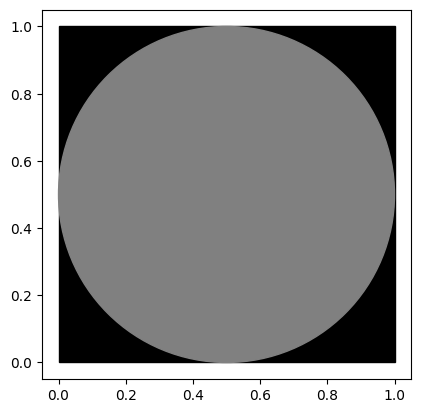

Для n = 1  Радиус: 0.49999999999999956 
Разница с результатом с сайта составляет: 4.440892098500626e-16


In [188]:
n=1
optimal(n)

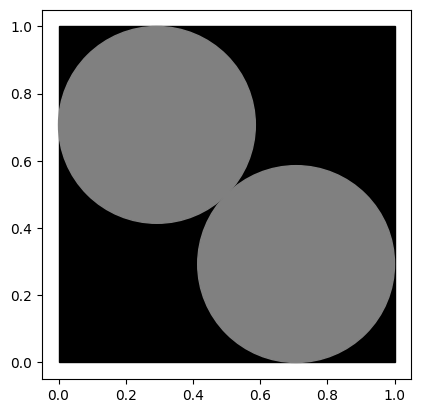

Для n = 2  Радиус: 0.2928932188074985 
Разница с результатом с сайта составляет: 5.953959547611021e-12


In [149]:
n=2
optimal(n)

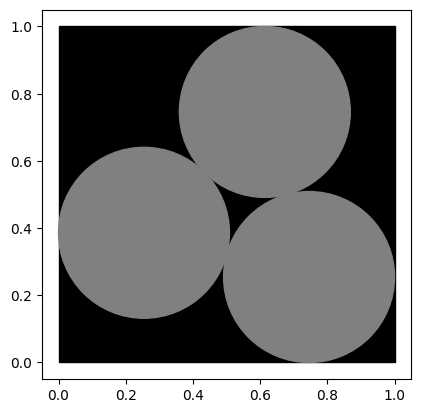

Для n = 3  Радиус: 0.2543330824246718 
Разница с результатом с сайта составляет: 1.2605578025848274e-08


In [150]:
n=3
optimal(n)

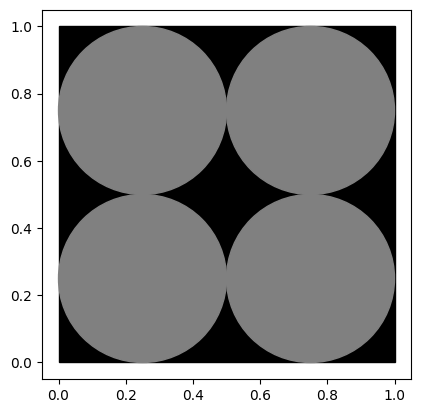

Для n = 4  Радиус: 0.24999999999762748 
Разница с результатом с сайта составляет: 2.372518848048344e-12


In [151]:
n=4
optimal(n)

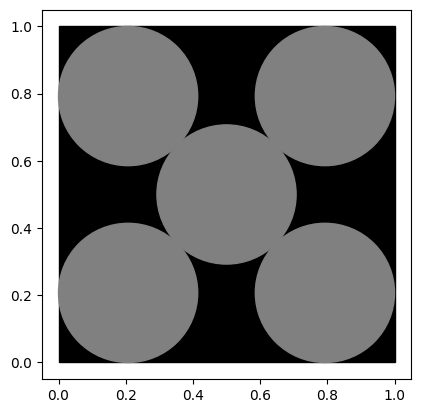

Для n = 5  Радиус: 0.2071067732451998 
Разница с результатом с сайта составляет: 7.941347718309899e-09


In [152]:
n=5
optimal(n)

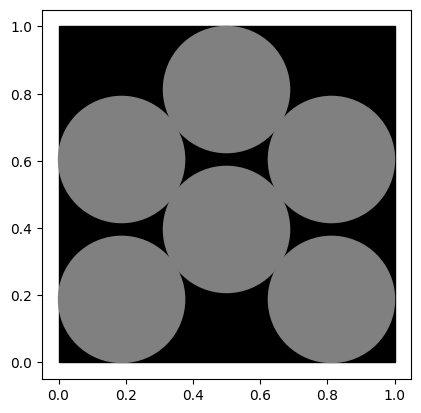

Для n = 6  Радиус: 0.1876805740526729 
Разница с результатом с сайта составляет: 2.7094803956018154e-08


In [153]:
n=6
optimal(n)

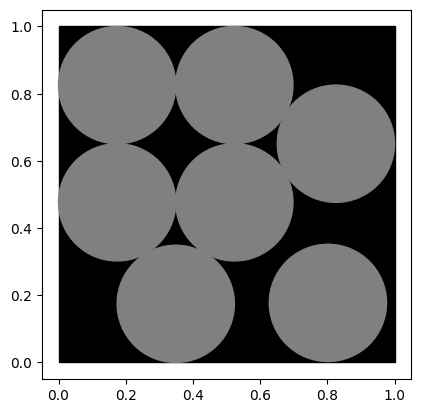

Для n = 7  Радиус: 0.17445763018701763 
Разница с результатом с сайта составляет: 8.18789480661053e-15


In [154]:
n=7
optimal(n)

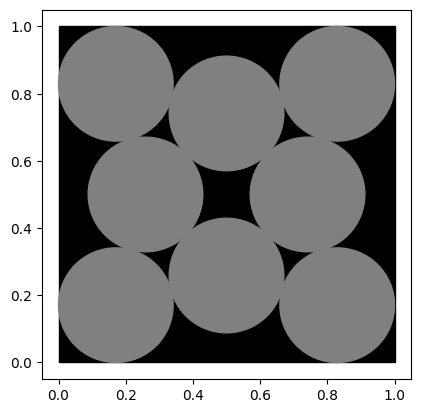

Для n = 8  Радиус: 0.17054068868625274 
Разница с результатом с сайта составляет: 1.4801687653331896e-11


In [155]:
n=8
optimal(n)

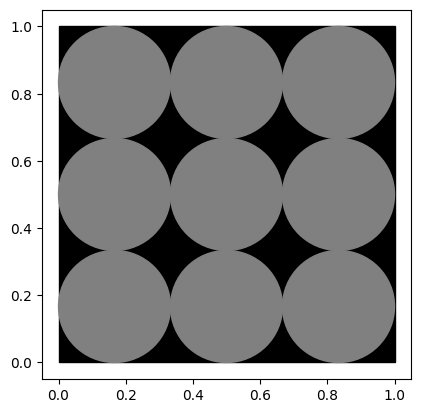

Для n = 9  Радиус: 0.16666666061074087 
Разница с результатом с сайта составляет: 6.055925788617245e-09


In [156]:
n=9
optimal(n)

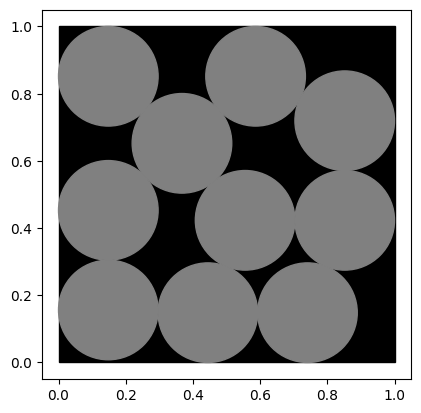

Для n = 10  Радиус: 0.14820432136629186 
Разница с результатом с сайта составляет: 1.1989369497200641e-09


In [163]:
n=10
optimal(n)

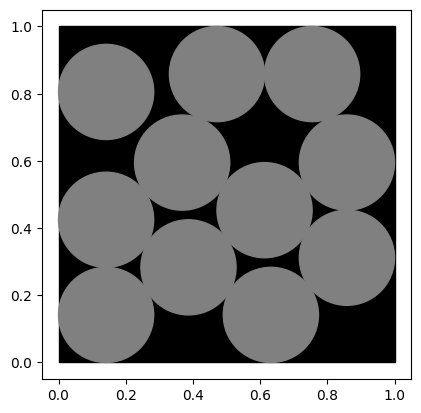

Для n = 11  Радиус: 0.14158566768266984 
Разница с результатом с сайта составляет: 0.0008135700131305379


In [165]:
n=11
optimal(n)

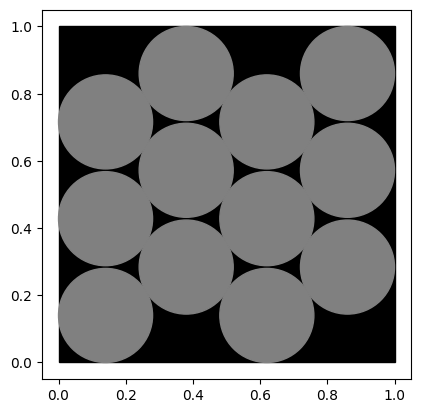

Для n = 12  Радиус: 0.13995876676460958 
Разница с результатом с сайта составляет: 7.727381845512582e-08


In [166]:
n=12
optimal(n)

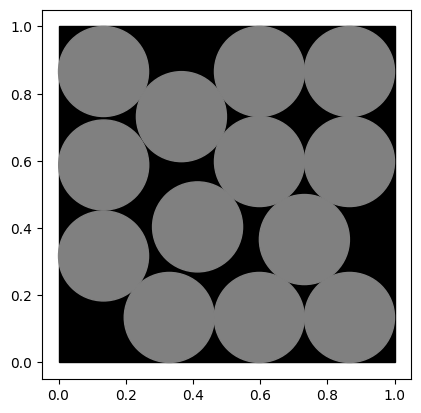

Для n = 13  Радиус: 0.13397457507807004 
Разница с результатом с сайта составляет: 1.8938420938446887e-05


In [167]:
n=13
optimal(n)

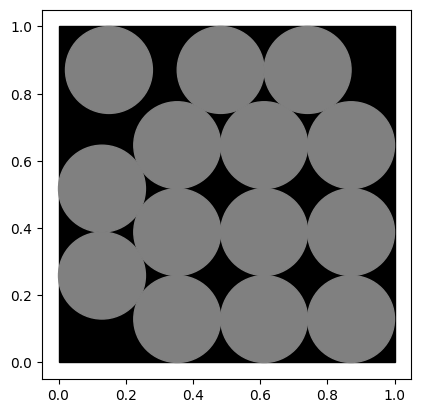

Для n = 14  Радиус: 0.12933178799064854 
Разница с результатом с сайта составляет: 5.719385492986007e-09


In [168]:
n=14
optimal(n)

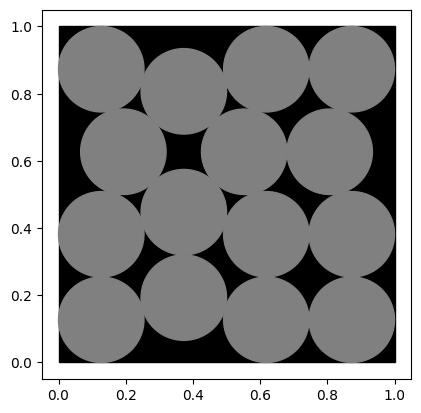

Для n = 15  Радиус: 0.12716650308799954 
Разница с результатом с сайта составляет: 4.442712536745219e-08


In [169]:
n=15
optimal(n)

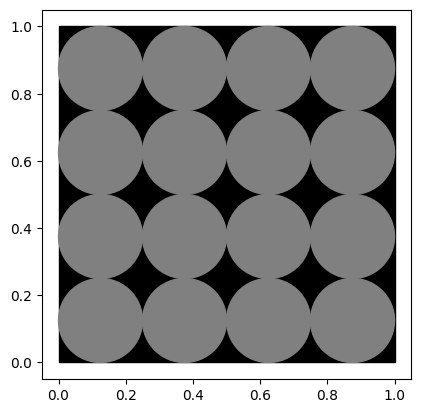

Для n = 16  Радиус: 0.12499998087928164 
Разница с результатом с сайта составляет: 1.912071835585838e-08


In [170]:
n=16
optimal(n)

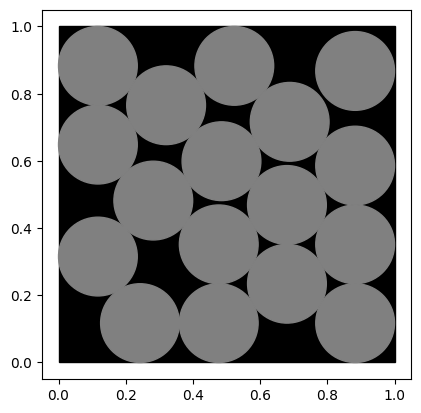

Для n = 17  Радиус: 0.117186729332199 
Разница с результатом с сайта составляет: 1.0013450749690733e-05


In [172]:
n=17
optimal(n)

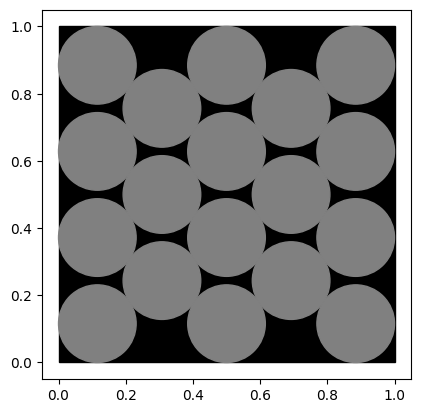

Для n = 18  Радиус: 0.11552142025525652 
Разница с результатом с сайта составляет: 1.2208742988795152e-08


In [173]:
n=18
optimal(n)

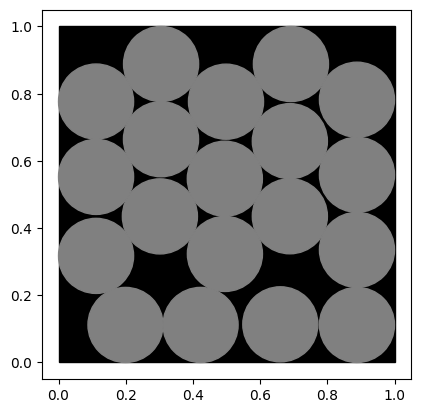

Для n = 19  Радиус: 0.11171639661572653 
Разница с результатом с сайта составляет: 0.0005490409552697667


In [174]:
n=19
optimal(n)

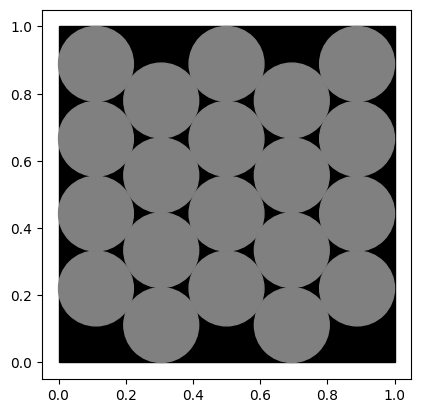

Для n = 20  Радиус: 0.11138231044149483 
Разница с результатом с сайта составляет: 3.7070984920672956e-08


In [175]:
n=20
optimal(n)

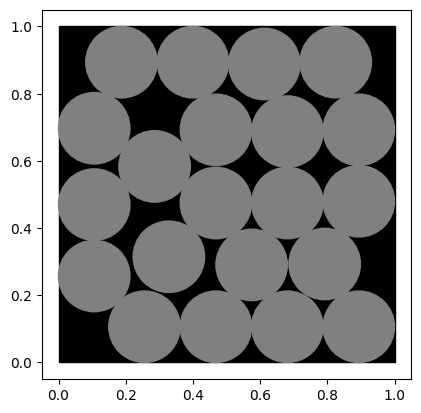

Для n = 21  Радиус: 0.10630229750743994 
Разница с результатом с сайта составляет: 0.000557914844624488


In [178]:
n=21
optimal(n)

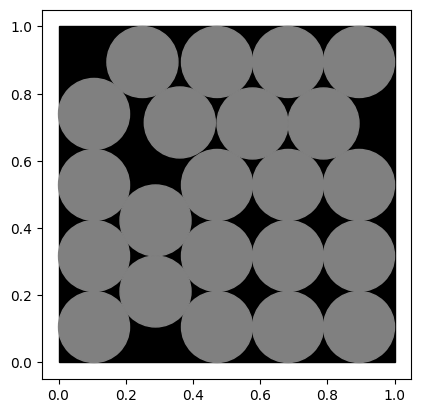

Для n = 22  Радиус: 0.10566243729737883 
Разница с результатом с сайта составляет: 2.8594595979231086e-06


In [179]:
n=22
optimal(n)

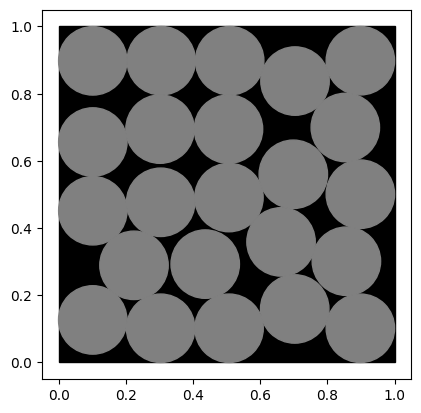

Для n = 23  Радиус: 0.10184369880847269 
Разница с результатом с сайта составляет: 0.00095862457131142


In [180]:
n=23
optimal(n)

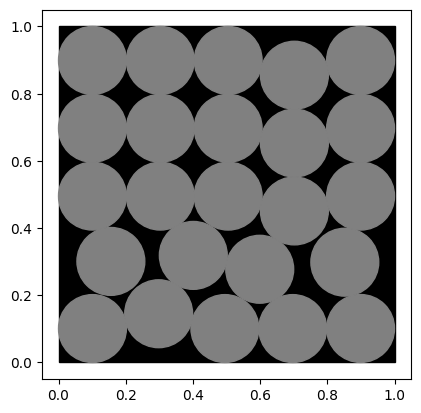

Для n = 24  Радиус: 0.10097355748247235 
Разница с результатом с сайта составляет: 0.0004082429491411854


In [181]:
n=24
optimal(n)

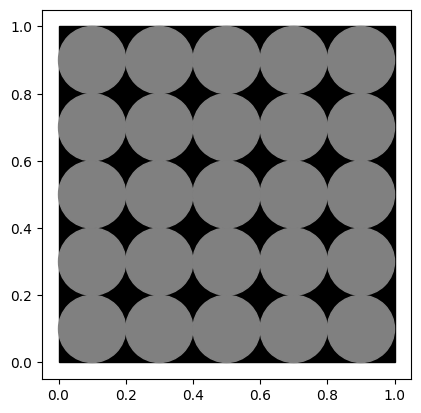

Для n = 25  Радиус: 0.09999985046913955 
Разница с результатом с сайта составляет: 1.495308604576584e-07


In [182]:
n=25
optimal(n)

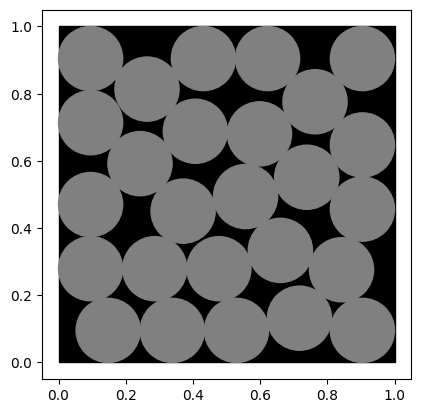

Для n = 26  Радиус: 0.09546630683574807 
Разница с результатом с сайта составляет: 0.0008960321741390276


In [183]:
n=26
optimal(n)

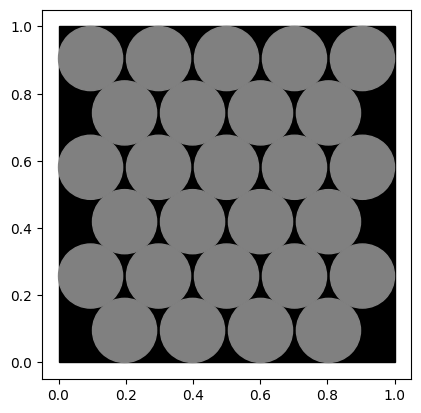

Для n = 27  Радиус: 0.09541995448715783 
Разница с результатом с сайта составляет: 4.7260778693325456e-08


In [184]:
n=27
optimal(n)

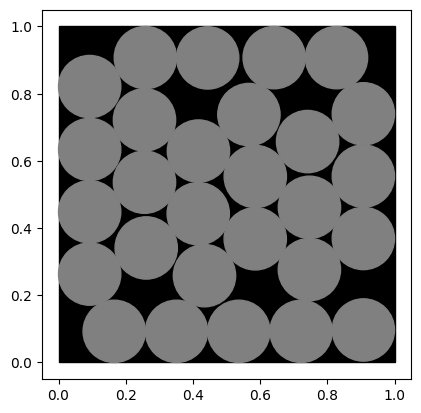

Для n = 28  Радиус: 0.09269877032750559 
Разница с результатом с сайта составляет: 0.0009740635052794822


In [185]:
n=28
optimal(n)

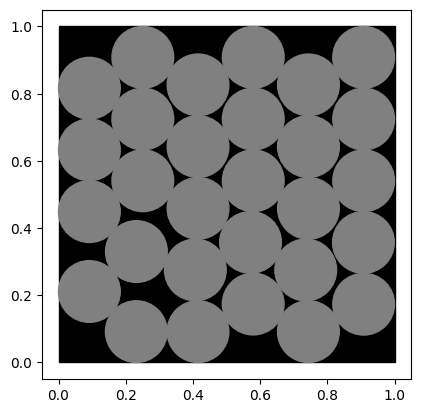

Для n = 29  Радиус: 0.09183095887647177 
Разница с результатом с сайта составляет: 0.0006321851638377285


In [186]:
n=29
optimal(n)

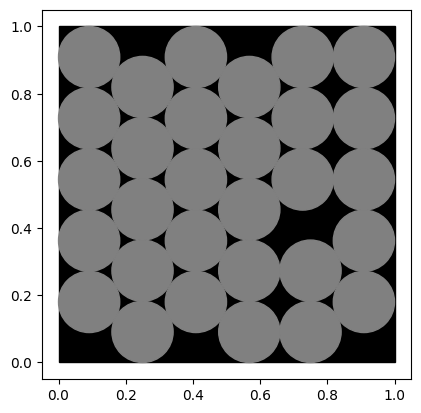

Для n = 30  Радиус: 0.0910905818237809 
Разница с результатом с сайта составляет: 0.0005804761622075494


In [187]:
n=30
optimal(n)

# Вывод


*   Проиллюстрировали найденные упаковки для значений n=1,2,…,30 .
*   Cравнили их значения со значениями сайта www.packomania.com
*   Пришли к выводу, что самая маленькая ошибка при n=1, наиболее большая при n=11,23,26,28.